In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
data_emlak = pd.read_csv("data_emlakjet_V3.csv",  index_col=0)
label_encoder = LabelEncoder()
data_emlak["İlan_Numarası"] = label_encoder.fit_transform(data_emlak["İlan_Numarası"])
# İlan numaralarını gizlemek için label encoder algoritması ile basit bir maskeleme yaptık.

In [40]:
print(data_emlak.columns)
print(data_emlak.info())

Index(['İlan_Numarası', 'İlan_Güncelleme_Tarihi', 'Kategorisi',
       'Brüt_Metrekare', 'Binanın_Yaşı', 'Binanın_Kat_Sayısı',
       'Kullanım_Durumu', 'Yatırıma_Uygunluk', 'Eşya_Durumu', 'Banyo_Sayısı',
       'İlan_Oluşturma_Tarihi', 'Türü', 'Net_Metrekare', 'Oda_Sayısı',
       'Bulunduğu_Kat', 'Isıtma_Tipi', 'Krediye_Uygunluk', 'Site_İçerisinde',
       'Takas', 'Fiyat_Durumu', 'Fiyatı', 'İl', 'İlçe', 'Mahalle', 'yaka',
       'Yaşam_endeksi'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2983 entries, 0 to 3189
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   İlan_Numarası           2983 non-null   int64  
 1   İlan_Güncelleme_Tarihi  2983 non-null   object 
 2   Kategorisi              2983 non-null   object 
 3   Brüt_Metrekare          2983 non-null   int64  
 4   Binanın_Yaşı            2983 non-null   object 
 5   Binanın_Kat_Sayısı      2983 non-null   i

In [48]:
head =data_emlak.head(10)
head.style.background_gradient(cmap = "rocket_r")

,İlan_Numarası,İlan_Güncelleme_Tarihi,Kategorisi,Brüt_Metrekare,Binanın_Yaşı,Binanın_Kat_Sayısı,Kullanım_Durumu,Yatırıma_Uygunluk,Eşya_Durumu,Banyo_Sayısı,İlan_Oluşturma_Tarihi,Türü,Net_Metrekare,Oda_Sayısı,Bulunduğu_Kat,Isıtma_Tipi,Krediye_Uygunluk,Site_İçerisinde,Takas,Fiyat_Durumu,Fiyatı,İl,İlçe,Mahalle,yaka,Yaşam_endeksi
0,2003,02 Şubat 2022,Satılık,190,5-10,20,Kiracı Oturuyor,Bilinmiyor,Yok,2,27 Ocak 2022,Konut,168,4+1,1. Kat,Klimalı,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,18000000,İstanbul,Beşiktaş,Nisbetiye Mahallesi,Avrupa Yakası,0.911000
1,166,14 Ocak 2022,Satılık,300,21 Ve Üzeri,2,Kiracı Oturuyor,Bilinmiyor,Yok,3,15 Ekim 2021,Konut,270,5+1,Bahçe Katı,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,8500000,İstanbul,Beşiktaş,Akat Mahallesi,Avrupa Yakası,0.911000
2,167,14 Ocak 2022,Satılık,350,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,2,15 Ekim 2021,Konut,320,5+2,Düz Giriş,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,16500000,İstanbul,Beşiktaş,Levent Mahallesi,Avrupa Yakası,0.911000
3,115,06 Ocak 2022,Satılık,450,5-10,4,Kiracı Oturuyor,Bilinmiyor,Yok,3,22 Eylül 2021,Konut,400,6+2,Düz Giriş,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,22000000,İstanbul,Beşiktaş,Levazım Mahallesi,Avrupa Yakası,0.911000
4,2879,08 Şubat 2022,Satılık,160,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,1,08 Şubat 2022,Konut,140,3+1,1. Kat,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,4250000,İstanbul,Beşiktaş,Nisbetiye Mahallesi,Avrupa Yakası,0.911000
5,2878,08 Şubat 2022,Satılık,65,21 Ve Üzeri,4,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,1,08 Şubat 2022,Konut,55,2+1,Bahçe Katı,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,875000,İstanbul,Beşiktaş,Arnavutköy Mahallesi,Avrupa Yakası,0.911000
6,2762,07 Şubat 2022,Satılık,350,21 Ve Üzeri,6,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,4,07 Şubat 2022,Konut,300,5+1,6. Kat,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,28000000,İstanbul,Beşiktaş,Sinanpaşa Mahallesi,Avrupa Yakası,0.911000
7,2707,06 Şubat 2022,Satılık,90,21 Ve Üzeri,7,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,1,06 Şubat 2022,Konut,85,2+1,Bahçe Katı,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,1250000,İstanbul,Beşiktaş,Etiler Mahallesi,Avrupa Yakası,0.911000
8,2699,06 Şubat 2022,Satılık,160,21 Ve Üzeri,9,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,1,06 Şubat 2022,Konut,130,3+1,8. Kat,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,4950000,İstanbul,Beşiktaş,Nisbetiye Mahallesi,Avrupa Yakası,0.911000
9,2737,07 Şubat 2022,Satılık,190,16-20,5,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,2,07 Şubat 2022,Konut,170,4+1,2. Kat,Doğalgaz,KREDIYE UYGUN,Hayır,Var,Genel Fiyat,7600000,İstanbul,Beşiktaş,Yıldız Mahallesi,Avrupa Yakası,0.911000


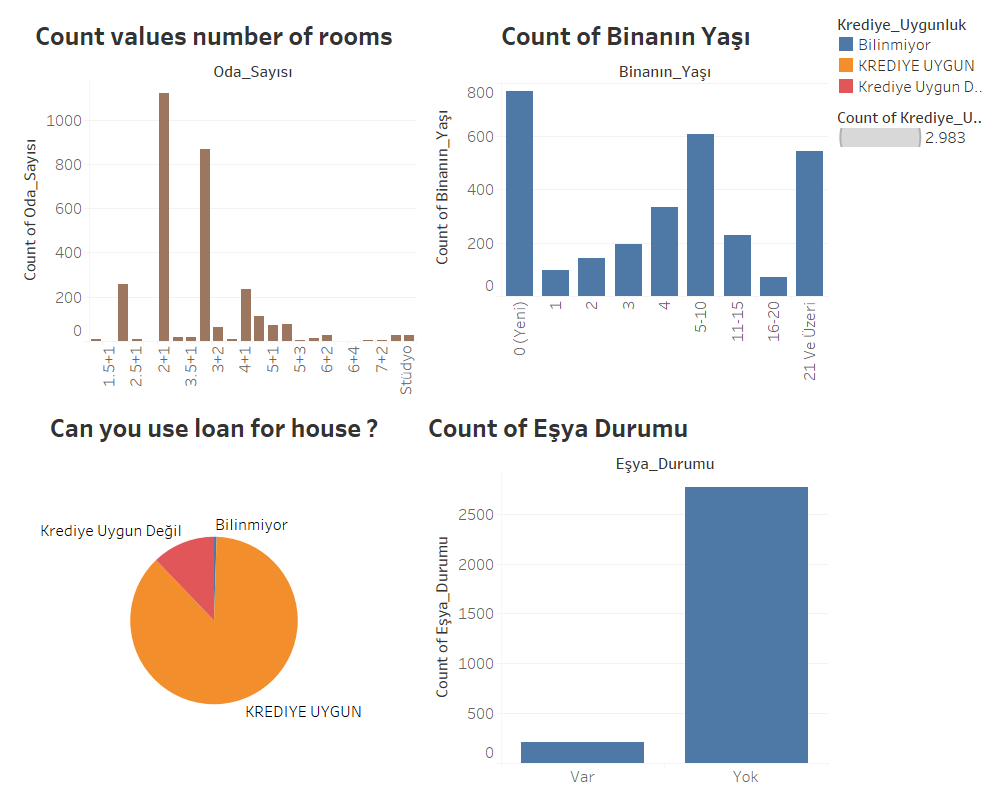

In [38]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Dashboard 1.png")

# Feature Creation
*  Bu bölümde data ile ilgili yeni kolonlar yaratmaya çalışalım ve bunları görselleştirmemize ekleyelim.
1. Bulunan ilçenin hangi yakada olduğu ? 
2. İlçeler ile ilgili genel bir kriter var mı ? (yaşam standardı, gelir seviyesi gibi)
* İstanbul Üniversitesi (İÜ) İktisat Fakültesi öğretim üyesi Doç. Dr. Murat Şeker, İstanbul'da 39 ilçe üzerinden yaptığı "İstanbul'da Yaşam Kalitesi Araştırması" adlı çalışma referans alındı. Bu çalışmaya göre data setimizde bulunan ilçelerin yaşam kalitesi endeksi ise şöyle:
* 	    1. BEŞİKTAŞ:	       0,911
     	2. KADIKÖY:         0,886
	    3. BAKIRKÖY:        0,613
        4. ŞİŞLİ:           0,574
        5. SARIYER:         0,347
        6. MALTEPE:         0,161
        7. BAHÇELİEVLER:    0,053
        8. PENDİK:          0,032
        9. BEYLİKDÜZÜ:	   0,025
        10. BAŞAKŞEHİR:    -0,152
        11. AVCILAR:       -0,161
        12. BAĞCILAR:      -0,190
        13. ESENYURT:      -0,194
3. Mevcut İlçelerin veya Mahallelerin denize kıyısa var mı ?
* Data'da bulunan ilçelerin çoğunun denize kıyısı olduğu için bu feature'dan vazgeçildi.

In [39]:
data_emlak["yaka"] = ["Anadolu Yakası" if str(i) == " Maltepe " or str(i) == " Pendik " or str(i) == " Kadıköy " else "Avrupa Yakası" for i in data_emlak["İlçe"]]
print("Avrupa ve Anadolu yakasında bulunan İlanların sayıları:\n" ,data_emlak["yaka"].value_counts())

Avrupa ve Anadolu yakasında bulunan İlanların sayıları:
 Avrupa Yakası     2091
Anadolu Yakası     892
Name: yaka, dtype: int64


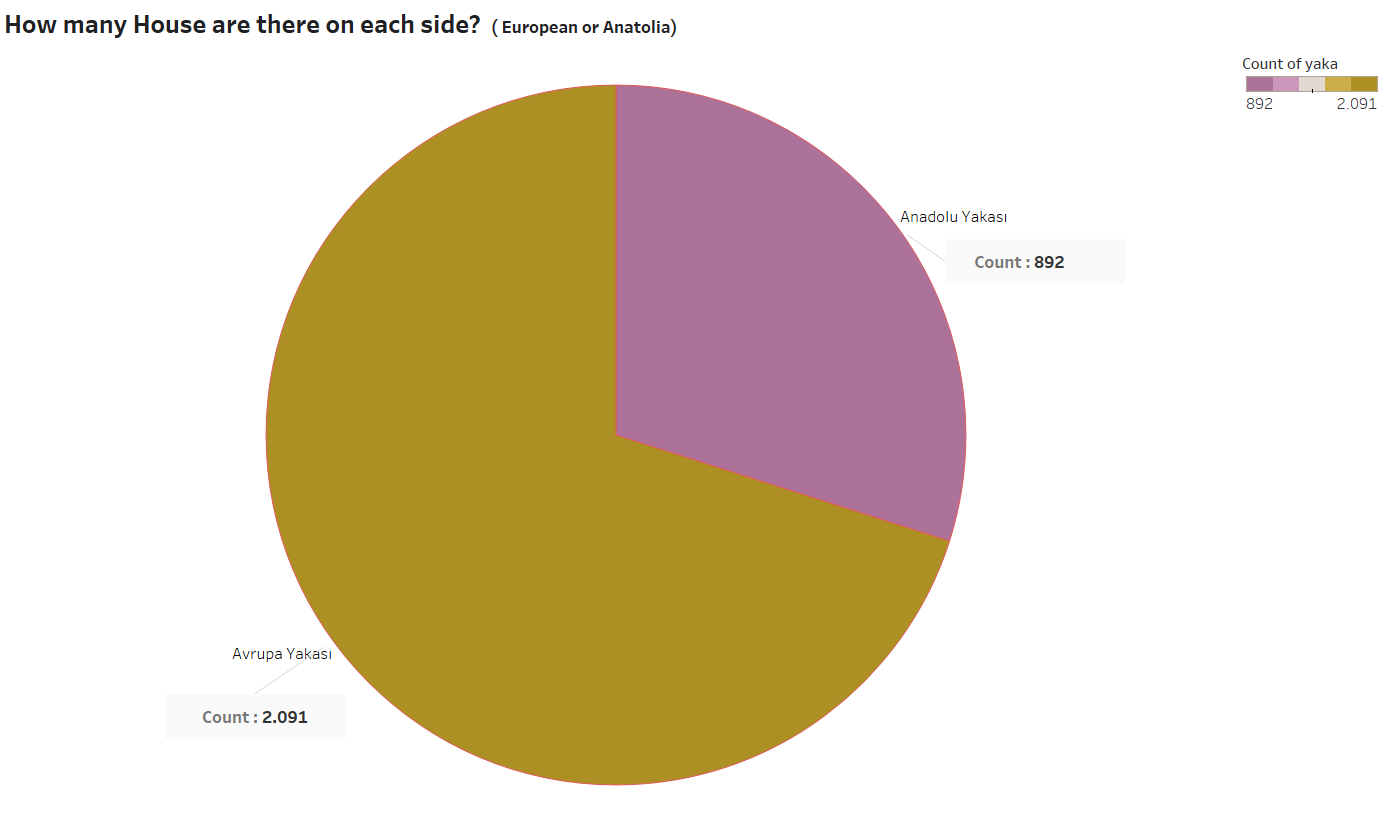

In [15]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Sheet 2.png")

# Aşağıdaki görselleştirme için bir yorum yapıcak olursak ilk başta sonuçlar şaşırtıcı olsa da veri azlığı ve çektiğimiz datanın "dengesiz data" olma eğilimi fazla olduğundan dolayı ilgili pasta grafiklerine kuşkuyla yaklaşmak mantıklı bir yaklaşım olacaktır.
# Ancak bizim veri setimize göre yorumlayacak olursak Anadolu yakasındaki ilan sayılarının payı geçtiğimiz seneye göre oldukça artmıştır.

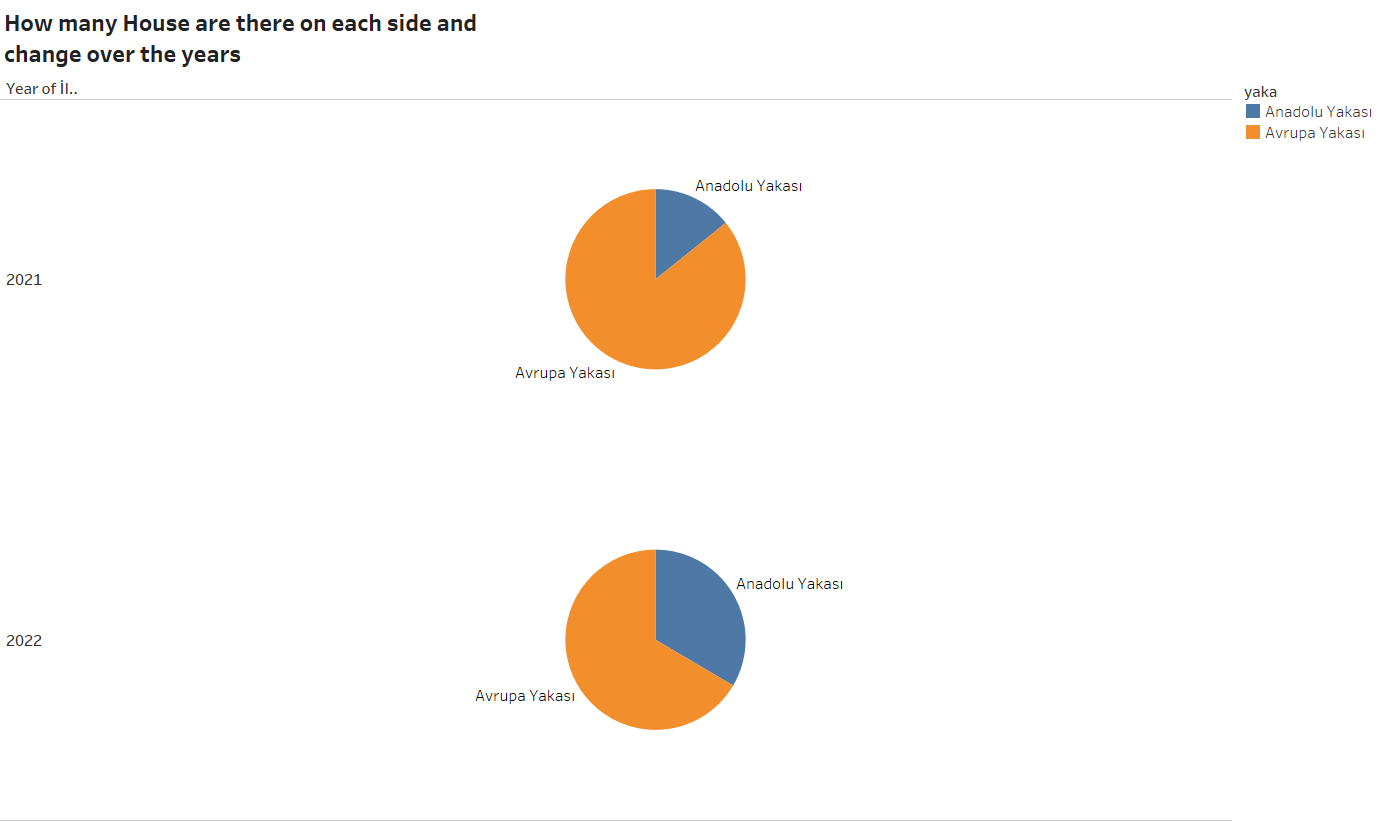

In [16]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Sheet 2erg.png")

In [31]:
yasam_endeksi = {"BEŞİKTAŞ", "KADIKÖY", "BAKIRKÖY", "ŞİŞLİ", "SARIYER", "MALTEPE",
        "BAHÇELİEVLER", "PENDİK", "BEYLİKDÜZÜ", "BAŞAKŞEHİR" ,"AVCILAR", "BAĞCILAR", "ESENYURT"}

data_emlak["Yaşam_endeksi"] = [0.911 if str(i) == " Beşiktaş " else 0.032 if str(i) == " Pendik " else
                               0.886 if str(i) == " Kadıköy "  else 0.613 if str(i) == " Bakırköy " else
                               0.574 if str(i) == " Şişli " else 0.347 if str(i) == " Sarıyer " else
                               0.161 if str(i) == " Maltepe "  else 0.053 if str(i) == " Bahçelievler " else
                               0.025 if str(i) == " Beylikdüzü " else -0.152 if str(i) == " Başakşehir " else
                               -0.161 if str(i) == " Avcılar "  else -0.190 if str(i) == " Bağcılar " else
                               -0.194 if str(i) == " Esenyurt " else 0 for i in data_emlak["İlçe"]]

In [32]:
describe = pd.DataFrame(data_emlak["Yaşam_endeksi"]).describe().T
describe.style.background_gradient(cmap = "cividis")

,count,mean,std,min,25%,50%,75%,max
Yaşam_endeksi,2983.000000,0.212120,0.401684,-0.194000,-0.152000,0.053000,0.613000,0.911000


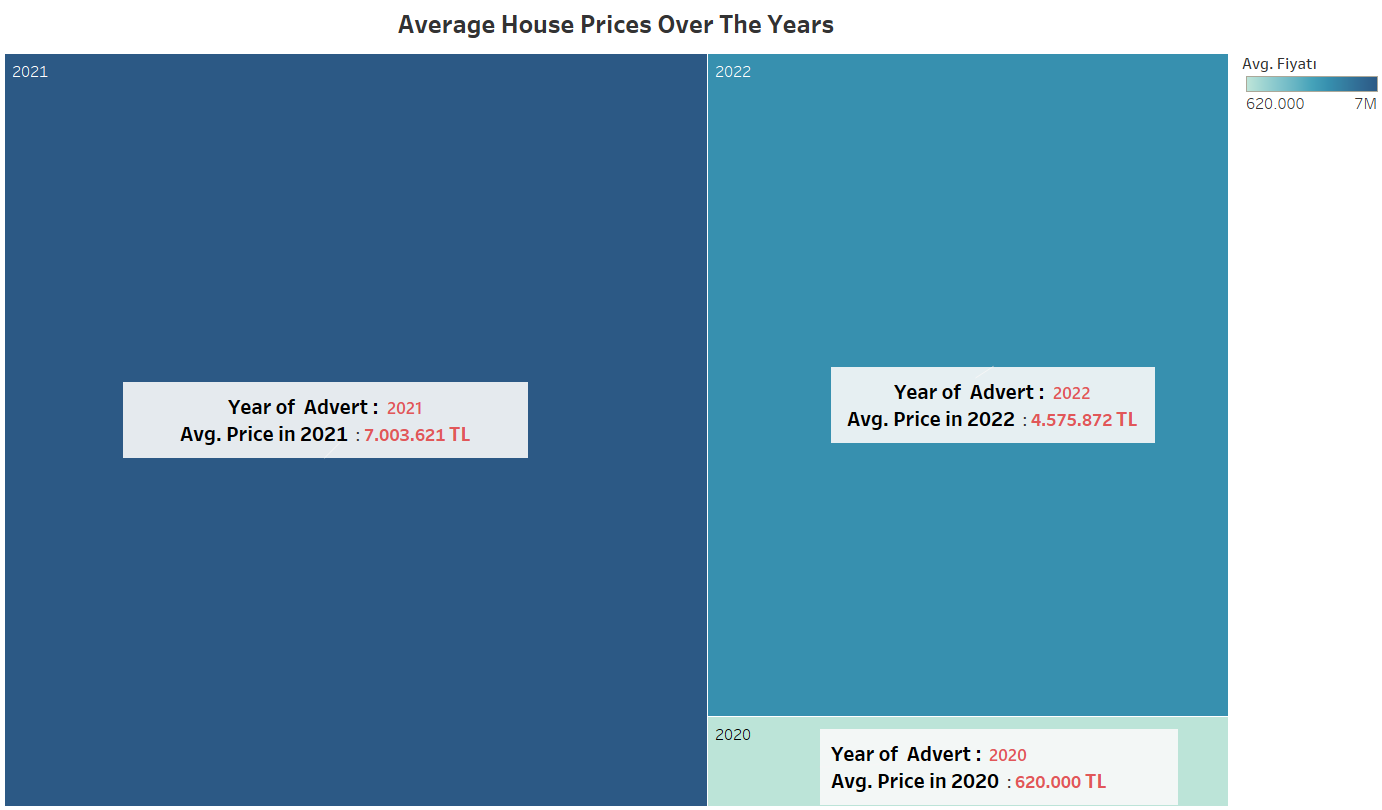

In [30]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Average House Prices Over The Years.png")

# Benzer perspektifte bakıcak olursak ilan tarihlerinin yıllara ve ilçelere göre ayrılmış halini görselleştirelim.
# Aynı şekilde burada da bazı sıkıntılar gözlemlenmekte. Bu sıkıntılar ise ;
1. daha çok veri çekerek (teorik olarak normalliğe yaklaşmak) 
2. selenium ile veri çekerken tarih ve miktar için algoritma üzerinde ilgili adımları atarak veri çeşitlendirmeyi sağlamak çözüm olarak sunulabilir.

# 2021 Yılında aynı işlemi gerçekleştirerek 1 yıllık fiyat artış oranlarını yine bu tablo ile gözlemleyebilirdik. Ancak fiyatlar ilanlar üzerinde sürekli güncellendiği (YÜKSELDİĞİ) için bu bilgiler data setimizde mevcut değil. Bu analiz de bambaşka bir projenin konusu.

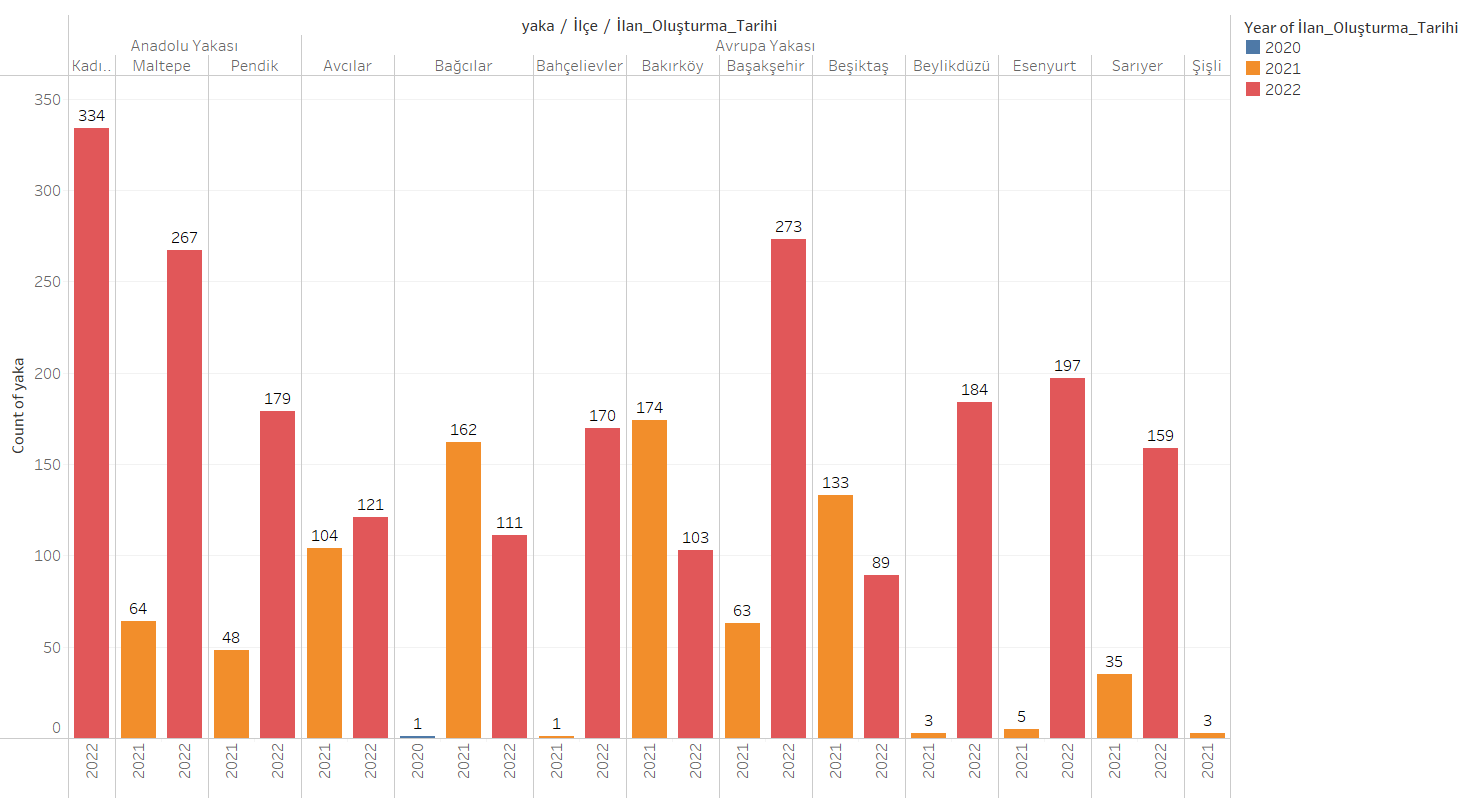

In [17]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Sheet asdf.png")

# Mevcut Görselleştirmeleri incelerken datasetimizin oldukça ufak ve gerçek hayatı yansıtmadığını kabul etmemiz gerek. Bu sebeple ilgili görselleştirmeleri sahip olduğumuz data üzerinden değerlendirmek en doğru tercih olacaktır.
* Data boyutunu öğrenmek için önce "Packed Bubbles" tekniğini kullanalım.

In [8]:
print("Data Shape is",data_emlak.shape,"\n","*"*100)
print("İlçe column value_counts: \n", data_emlak["İlçe"].value_counts())

Data Shape is (2983, 25) 
 ****************************************************************************************************
İlçe column value_counts: 
  Başakşehir       336
 Kadıköy          334
 Maltepe          331
 Bakırköy         277
 Bağcılar         274
 Pendik           227
 Avcılar          225
 Beşiktaş         222
 Esenyurt         202
 Sarıyer          194
 Beylikdüzü       187
 Bahçelievler     171
 Şişli              3
Name: İlçe, dtype: int64


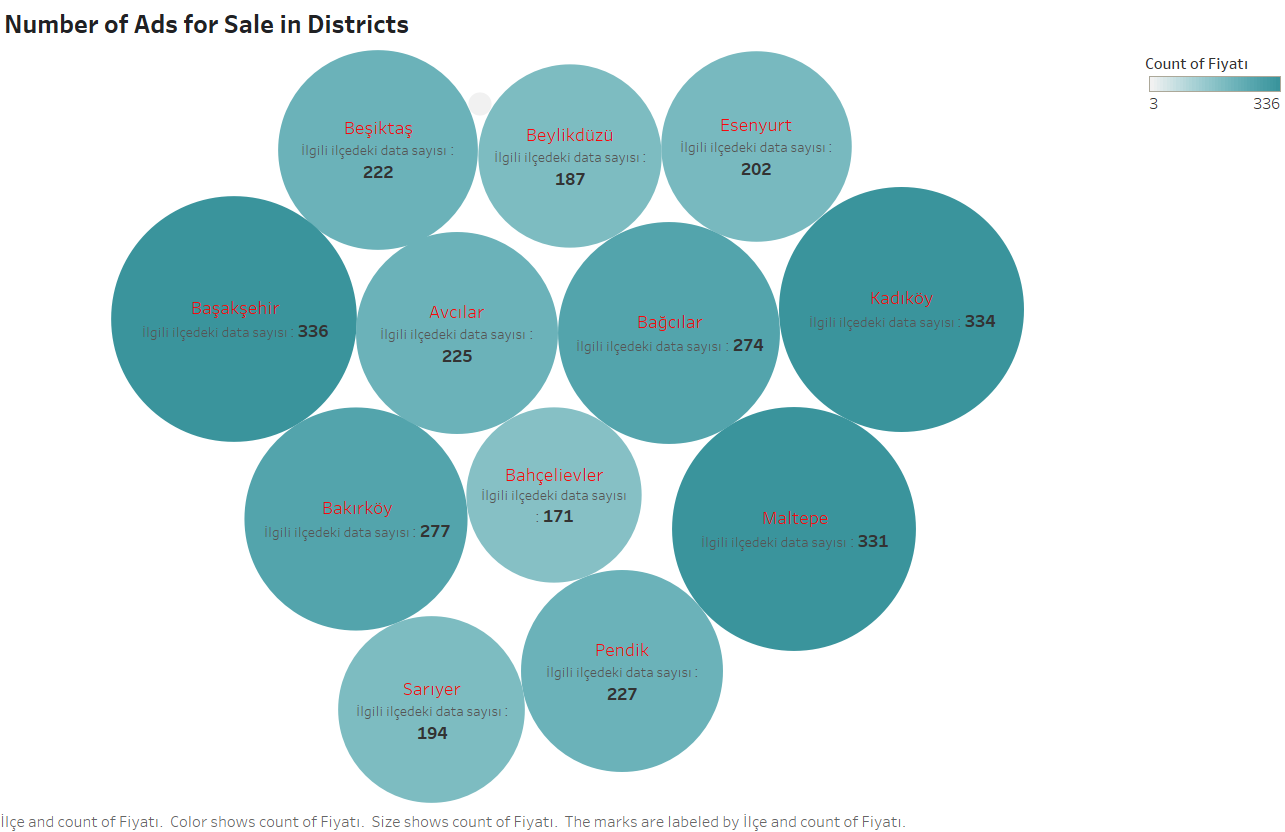

In [9]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Number of Ads for Sale in Districts.png")

In [29]:
describe = pd.DataFrame(data_emlak["Fiyatı"]).describe().T
describe.style.background_gradient(cmap = "gist_rainbow")

,count,mean,std,min,25%,50%,75%,max
Fiyatı,2983.000000,5221565.564197,37167172.382897,169000.000000,870000.000000,1650000.000000,3807500.000000,1800000000.000000


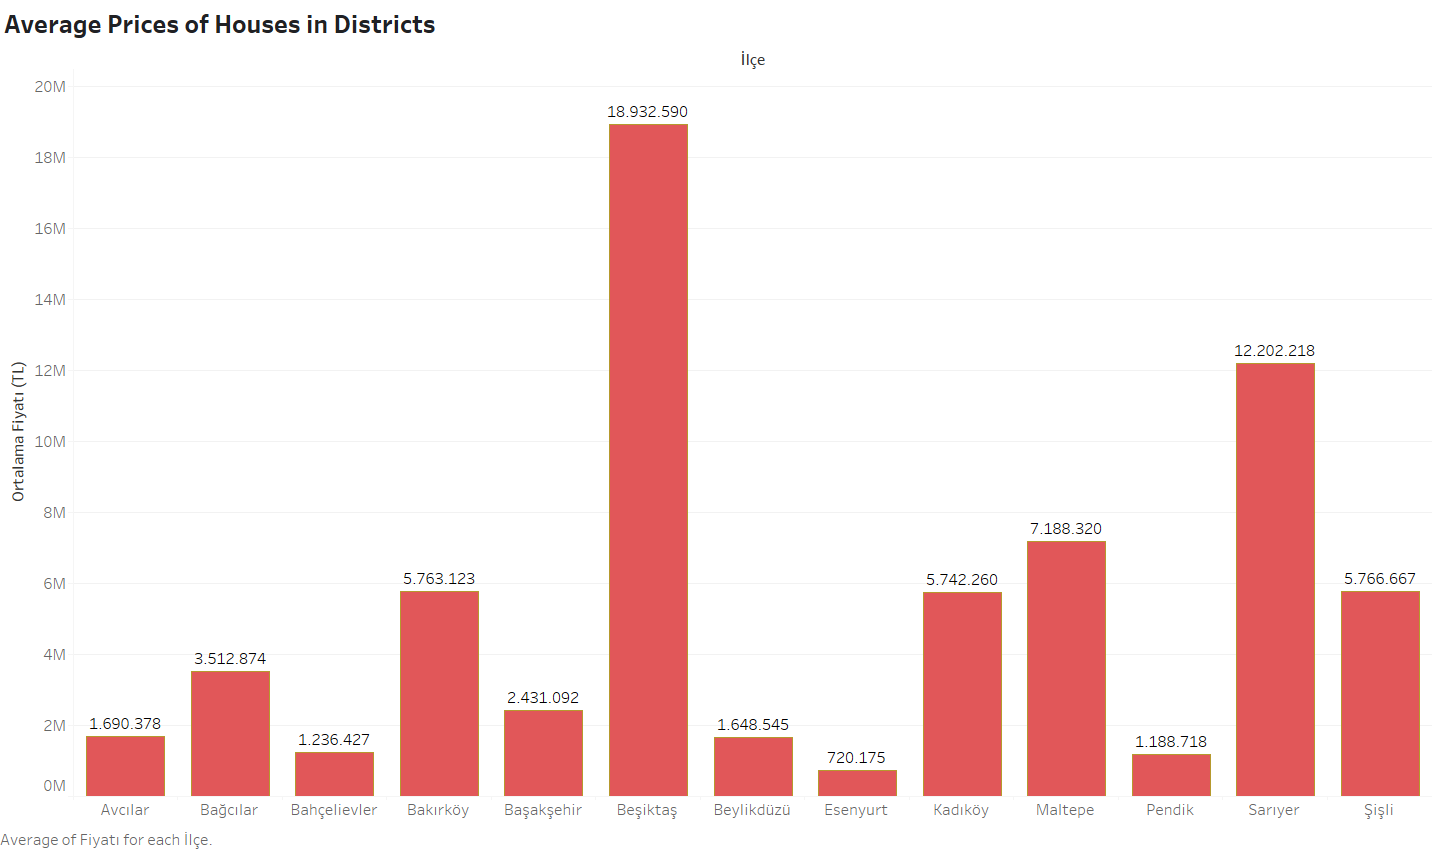

In [10]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Average Prices of Houses in Districts.png")

# Görselleştirme yapılırken tabloyu bozan ve değeri Milyar Liraları aşan verilerden dolayı görselleştirme yapılırken 100 Milyon Tl değerinden küçük olan veriler filtrelenmiştir.

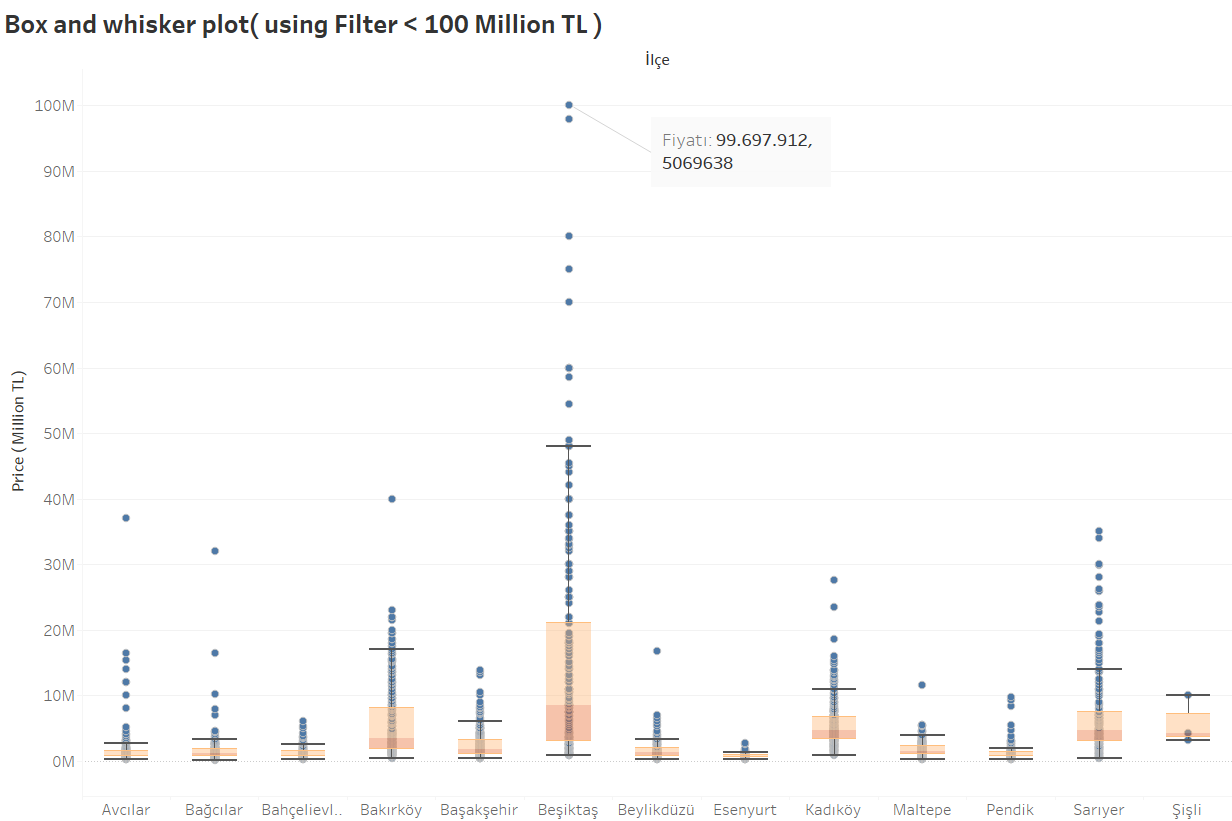

In [11]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Box and whisker plot.png")

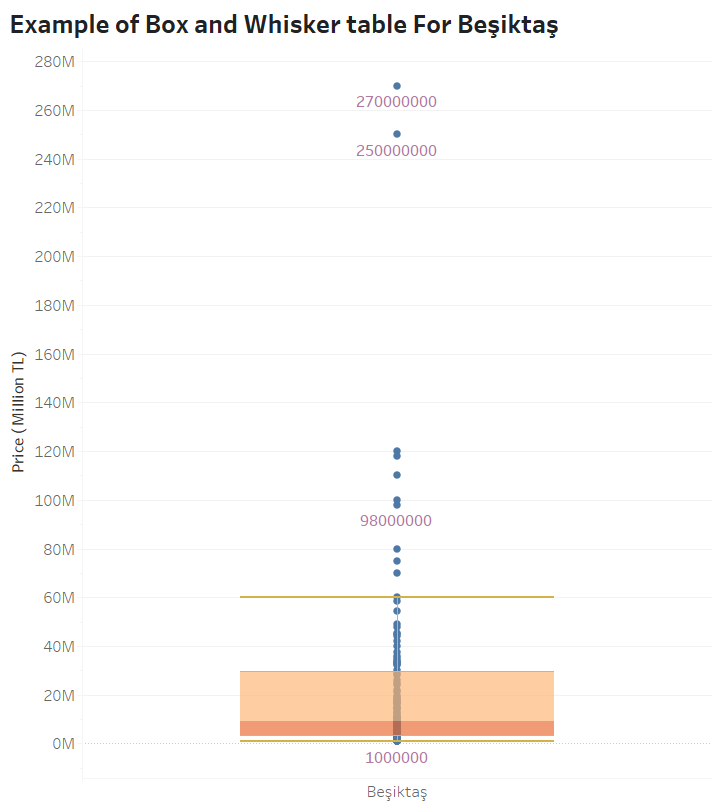

In [19]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Example of Box and Whisker table For Beşiktaş.png")

# Ortalama Fiyatları incelerken Harita üzerinden de faydalanalım.
* Harita üzerinden 8 ilçeyi incelersek;
1. En düşük ortalama ilan fiyatı Esenyurt ilinde olup en yüksek ortalama Beşiktaş ilçesindedir.

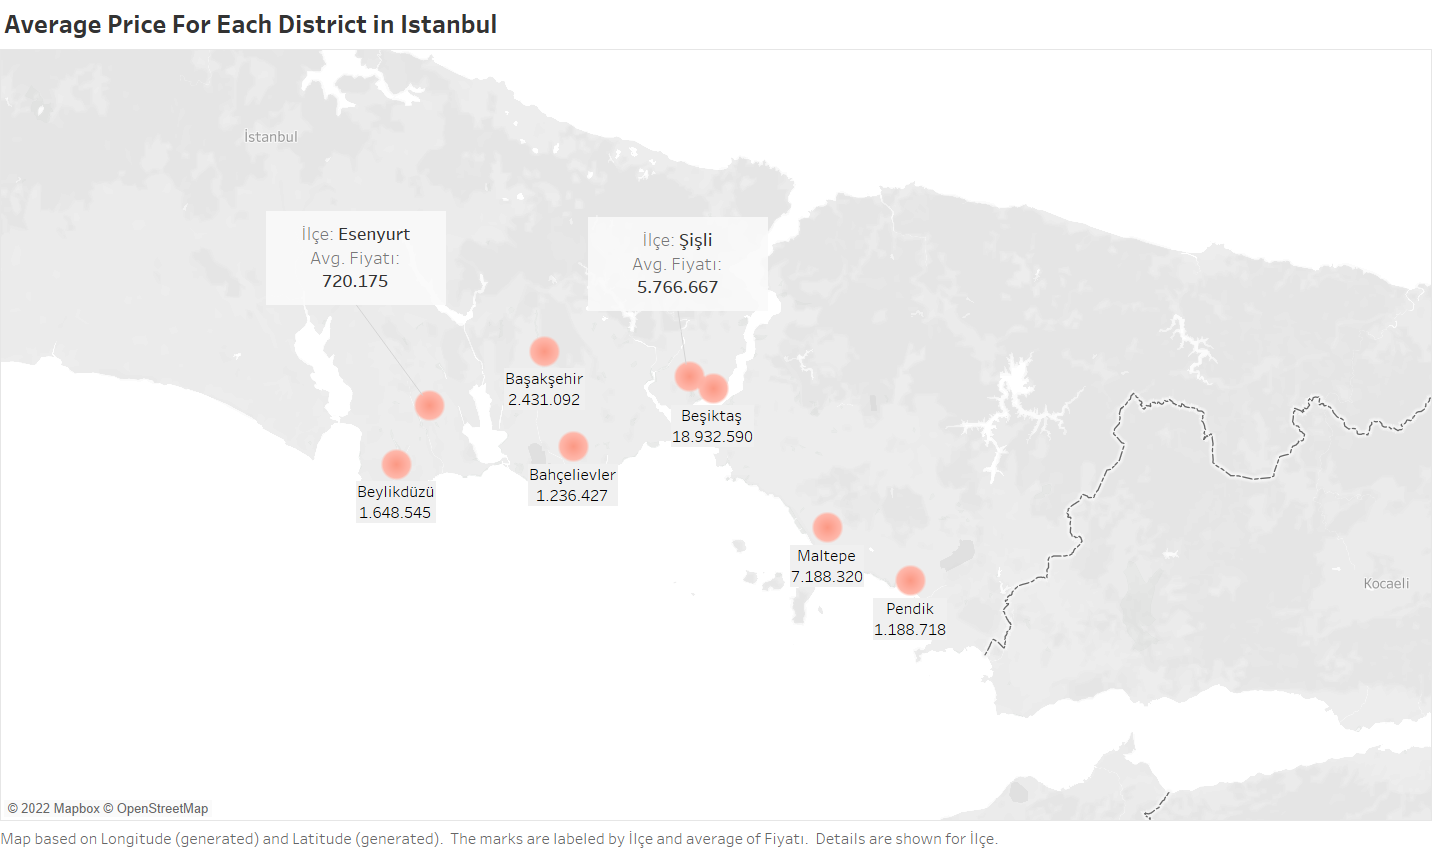

In [12]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Average Price For Each District in Istanbul.png")

# İlçelerde Bulunan İlanların Toplam Değerini Yine Harita Üzerinden İnceleyelim.
* Buradaki görselleştirme incelenirken Beşiktaş ilçesi göze çarpmakta. İstanbulun en güzel konumlarından biri olduğu düşünülürse sonuç pek de şaşırtıcı değil.

In [51]:
data_emlak.groupby(["İlçe"])["Fiyatı"].sum()  # Beşiktaş 4 Milyar 203 milyon 35 bin TL

İlçe
 Avcılar           380335000
 Bahçelievler      211428999
 Bakırköy         1596385000
 Bağcılar          962527400
 Başakşehir        816847040
 Beylikdüzü        308277988
 Beşiktaş         4203035000
 Esenyurt          145475299
 Kadıköy          1917915000
 Maltepe          2379334058
 Pendik            269839094
 Sarıyer          2367230200
 Şişli              17300000
Name: Fiyatı, dtype: int64

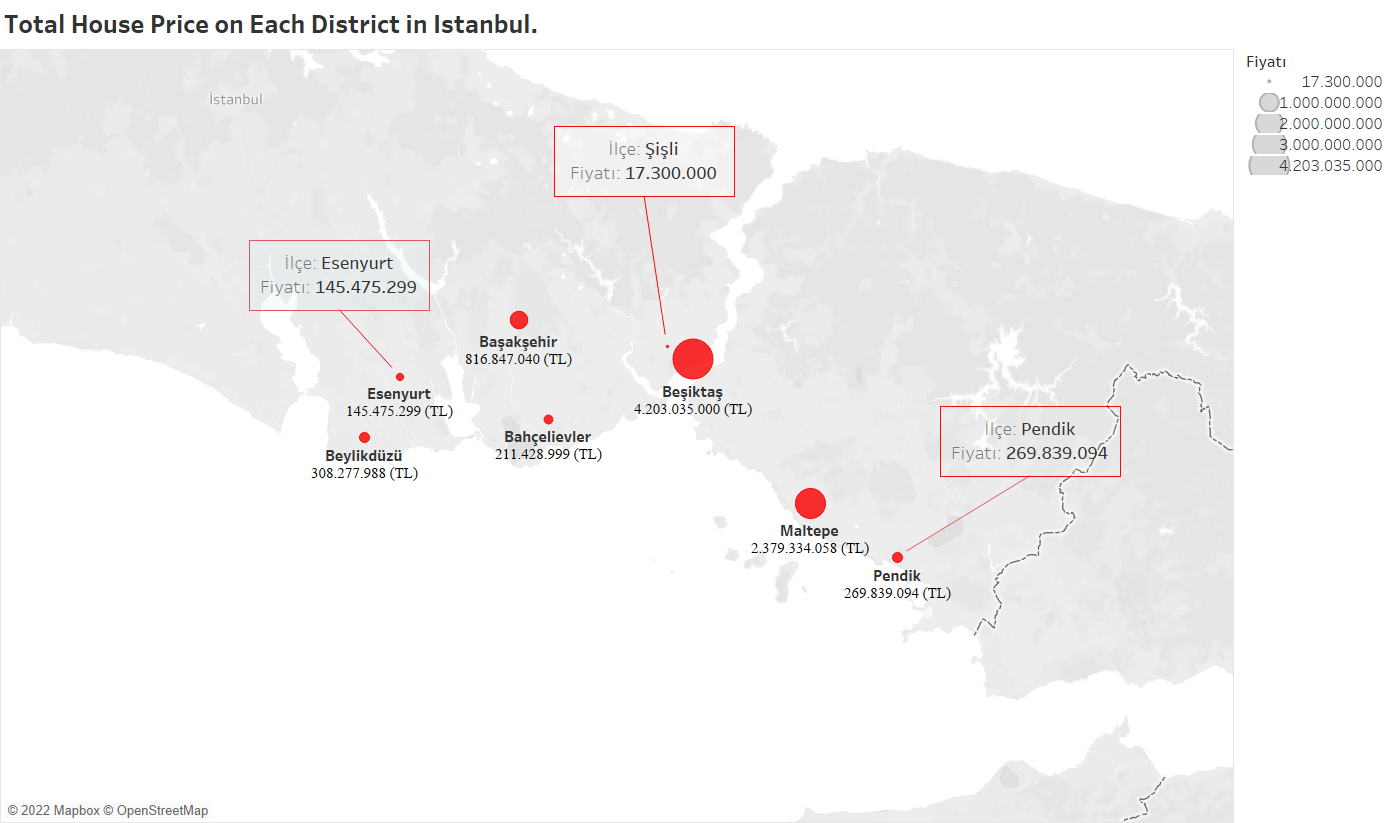

In [84]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Sheet 10.png")

# Ev Fiyatlarındaki dağılım grafiği yapılırken daha fazla veriye ihtiyaç duyulduğu açıkça göze çarpmakta.
* İlgili görselleştirme yapılırken 50 Milyon Tl değerinden düşük evler filtrelenmiştir. Dağılımın Sağa çarpık olduğunu gözlemlemekteyiz ve bu görece beklediğimiz bir sonuç.
* Mevcut dağılım için bazı istatistiki bilgiler;
1. Skewness: 3.44
2. Kurtosis: 14.74

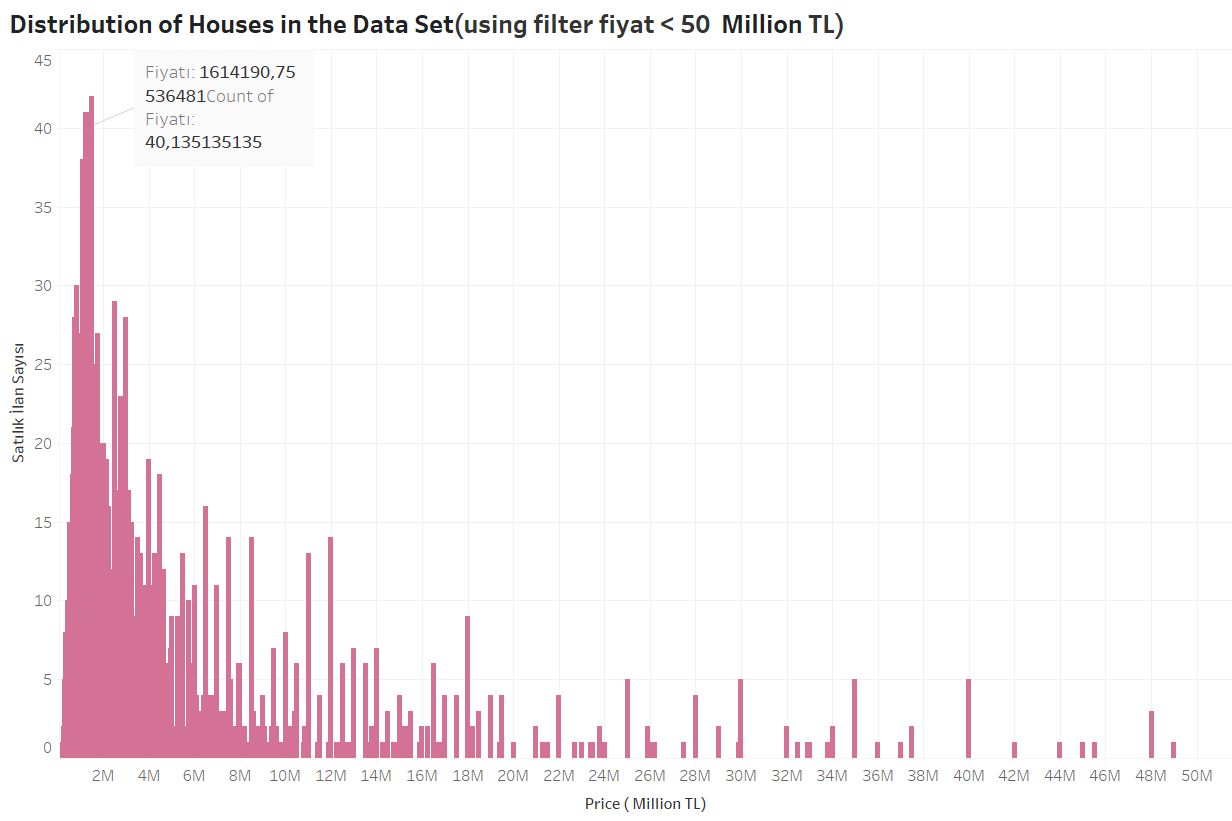

In [15]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Distribution.png")

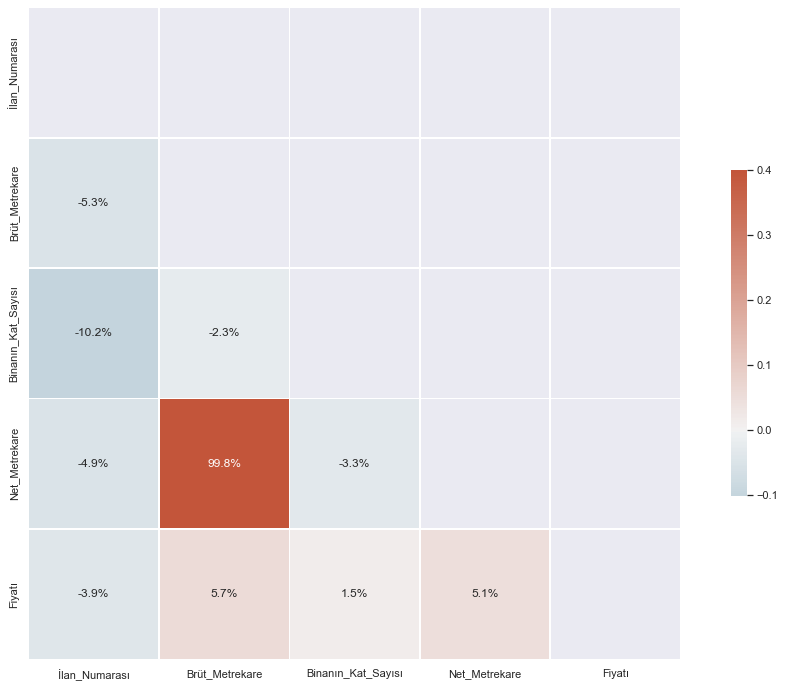

In [11]:
corr = data_emlak.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(style="dark")
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, annot=True ,fmt='.1%')

# Data içinde bulunan diğer kolonları da analiz edelim. Fiyata etki eden önemli bir kriter ise evin bulunduğu kat olabilir. 

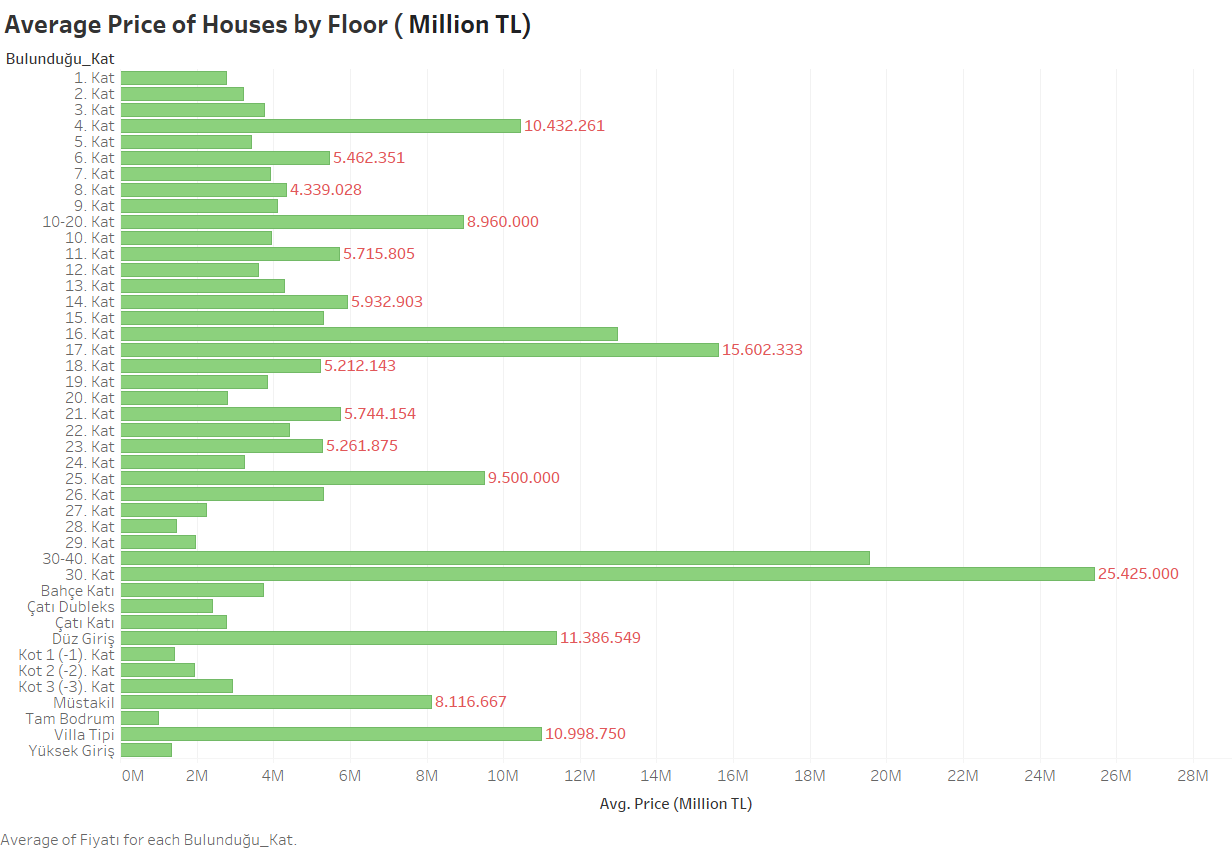

In [16]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Average Price of Houses by Floor ( Million TL).png")

# Oda sayısının data içindeki miktarı ve bu miktar içindeki ortalama fiyatların bar grafiği ile incelenmesi.

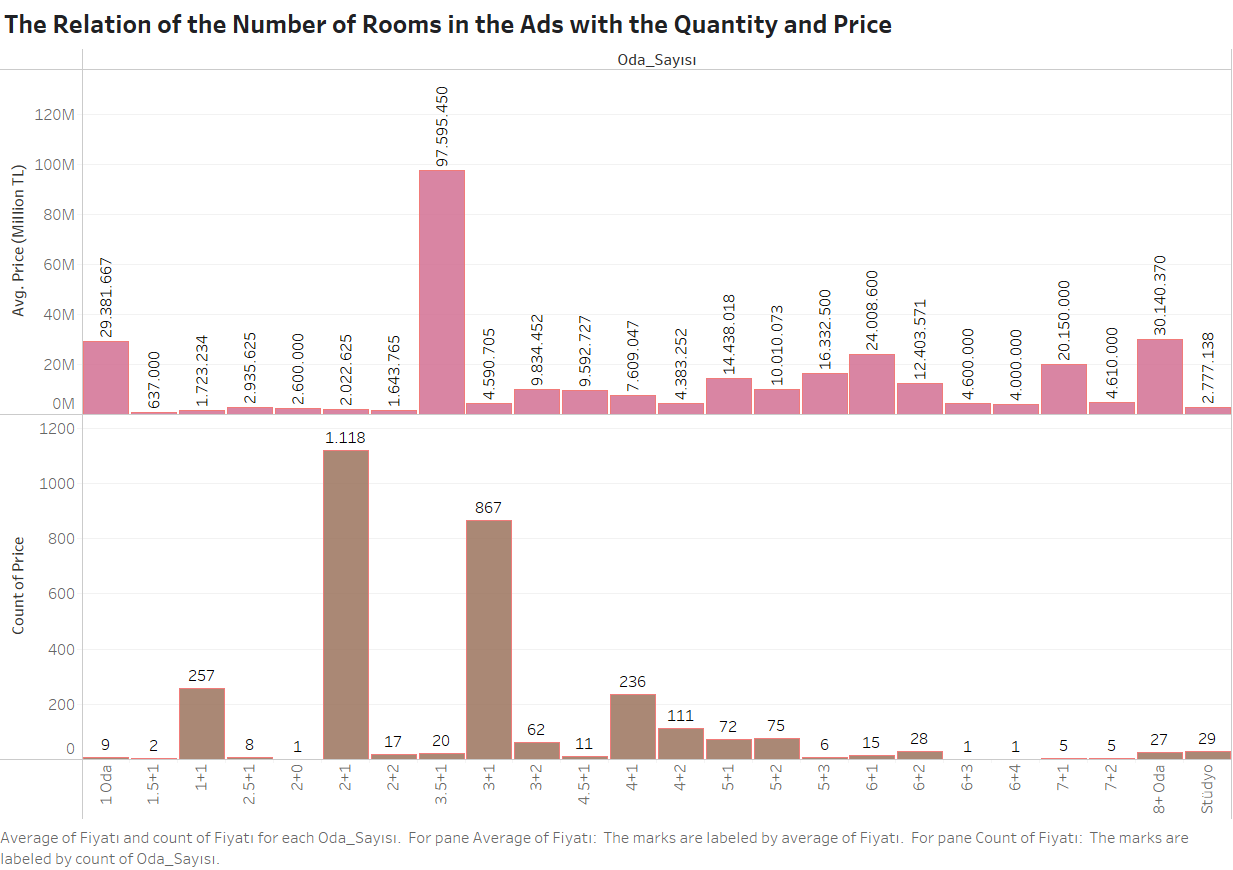

In [17]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\The Relation of the Number of Rooms in the Ads with the Quantity and Price.png")

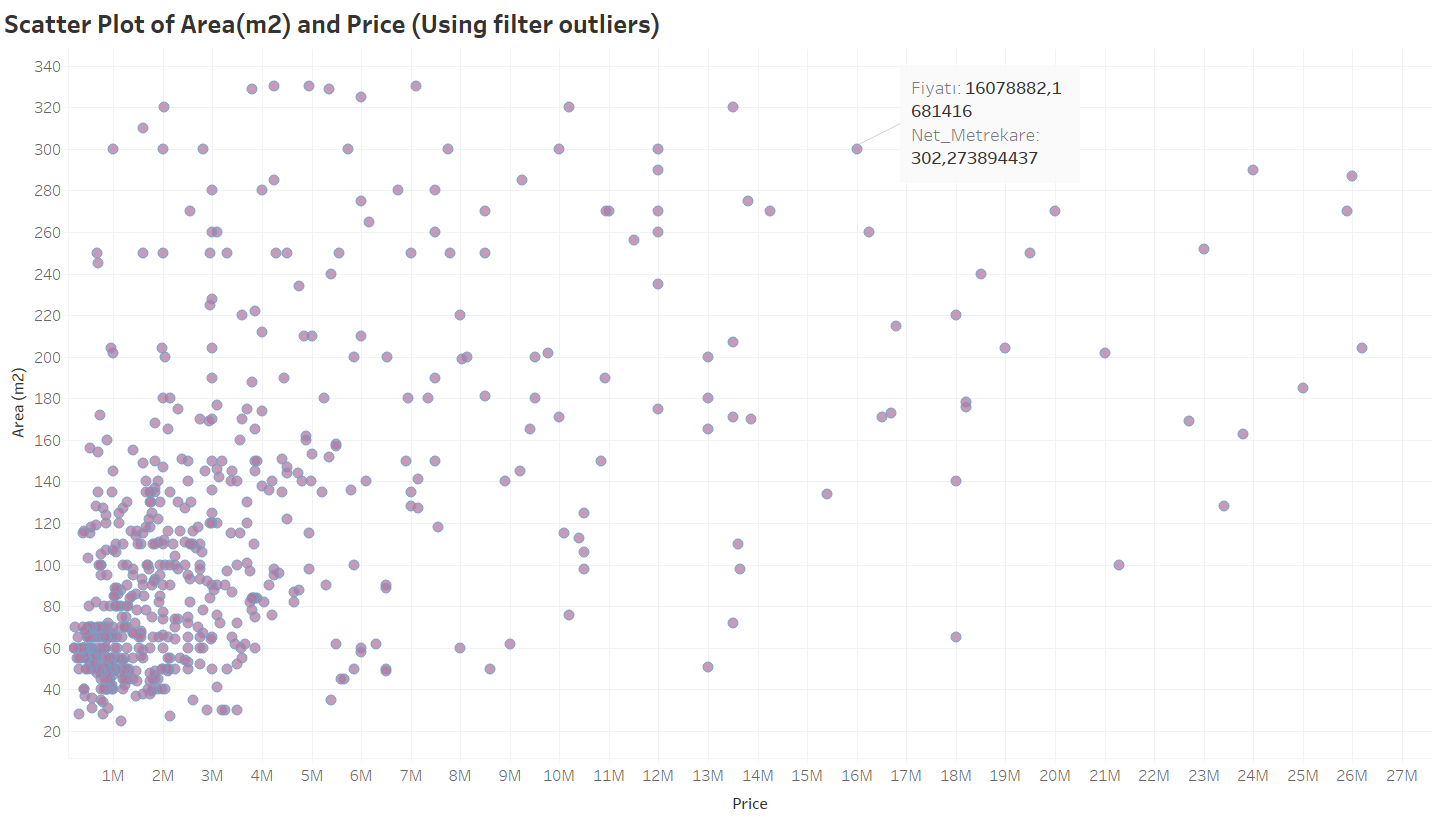

In [83]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Scatter Plot of Area(m2) and Price (Using filter outliers).png")

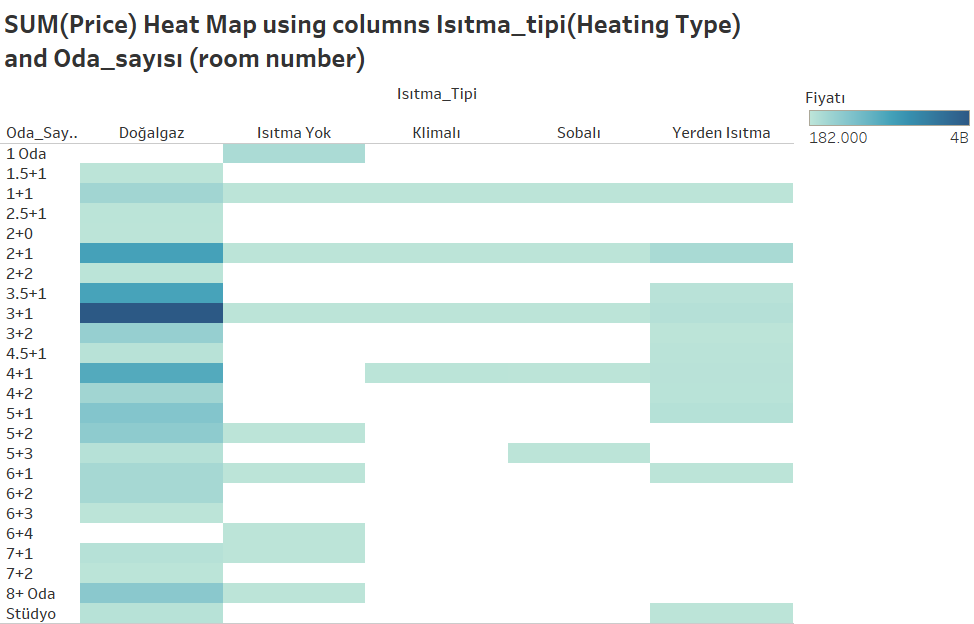

In [85]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\SUM(Price) Heat Map using columns Isıtma_tipi(Heating Type)  and Oda_sayısı (room number).png")

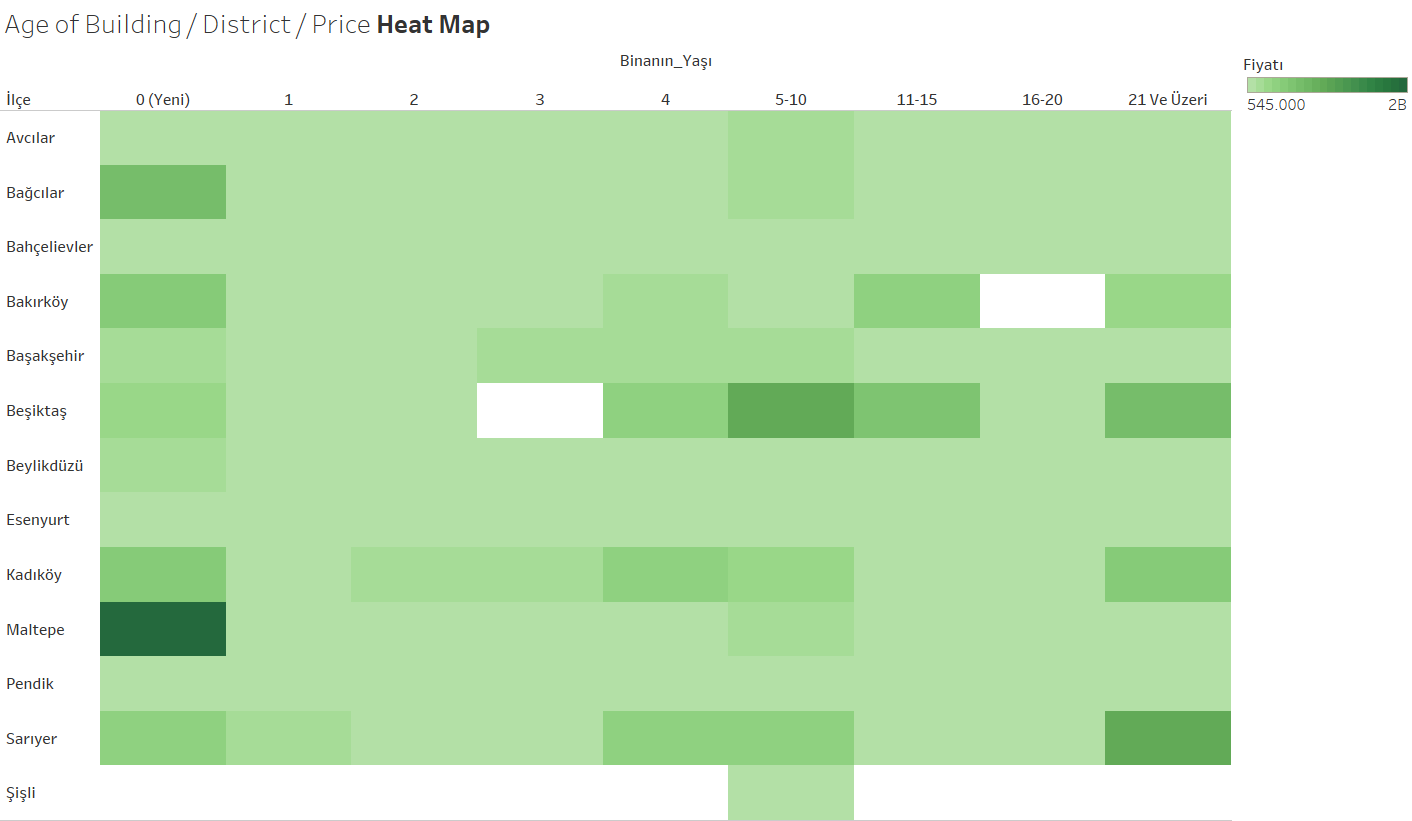

In [18]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\heat map 2.png")

# Bir diğer kriter Evlerin sahip olduğu ısınma seçeneği. Bunun için pasta grafiği Kullanılmıştır.
1. İstanbul için mevsim şartları ve gelişmişlik göz önüne alındığında Doğalgaz kullanımı oldukça yaygındır.
2. Burada "Merkezi Doğalgaz" Seçeneği de SQL aşamasında "Doğalgaz" olarak değiştirmiştir.

In [49]:
Isıtma_Tipi = pd.DataFrame(data_emlak["Isıtma_Tipi"].value_counts())
Isıtma_Tipi.style.background_gradient(cmap = "twilight_shifted")

,Isıtma_Tipi
Doğalgaz,2873
Yerden Isıtma,74
Isıtma Yok,20
Klimalı,8
Sobalı,8


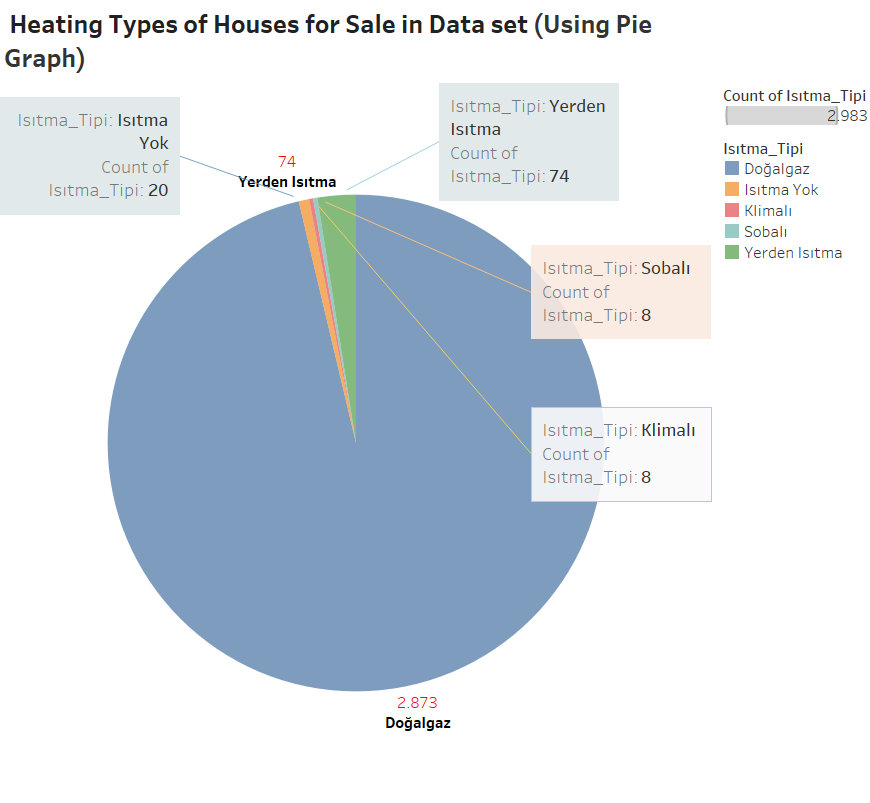

In [18]:
Image(r"C:\Users\Asus\Desktop\SOFTWARE\Tableau\emlakjet projesi\Heating.png")